# Lab | Logisitc Regression, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

- Read that data into Python and call the dataframe `churnData`.

In [3]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')

- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [7]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [8]:
churnData['TotalCharges'] =  pd.to_numeric(churnData['TotalCharges'], errors='coerce')

- Check for null values in the dataframe. Replace the null values.

In [10]:
round(churnData.isna().sum()/len(churnData),4)*100 

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
dtype: float64

In [11]:
# For column 'TotalCharges' there are some NaN-values so lets replace it with the mean of the columns
mean_clv = churnData['TotalCharges'].mean()
churnData['TotalCharges'].fillna(mean_clv, inplace=True)

- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:

In [13]:
# Let's construct a dataframe with the obove features
X = churnData.drop(columns=['gender','Partner','Dependents', 'PhoneService', 'OnlineSecurity',
                       'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','Churn'], axis = 1)
y = np.log(churnData['TotalCharges'])

churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [14]:
X_cols = X.select_dtypes(include=np.number).columns
X = X.select_dtypes(include=np.number)

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [15]:
X.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.

### Performing PCA

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [17]:
X_train.shape

(5634, 4)

  - Fit a logistic Regression model on the training data.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [19]:
X_train.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,-0.597127,-0.165922,-0.445690,-0.062630
1,1.780202,-0.526614,-0.508919,0.037403
2,-2.111007,-0.224500,0.122287,0.469953
3,-1.211850,0.195082,-0.938056,-0.104211
4,-0.846130,0.052429,-0.811390,0.762489


### Getting variances

In [20]:
# Getting
print(pca.explained_variance_ratio_) # Individual variances of each principal components
#print(pca.singular_values_)

[0.55264377 0.26463034 0.16756035 0.01516555]


In [21]:
variances = pca.explained_variance_ratio_.tolist()

In [22]:
variances[:2]

[0.5526437683112804, 0.2646303382422831]

In [24]:
total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head()

,num_pca,variance,cum_variance
0,1,0.552644,0.552644
1,2,0.264630,0.817274
2,3,0.167560,0.984834
3,4,0.015166,1.000000


<AxesSubplot:xlabel='num_pca', ylabel='cum_variance'>

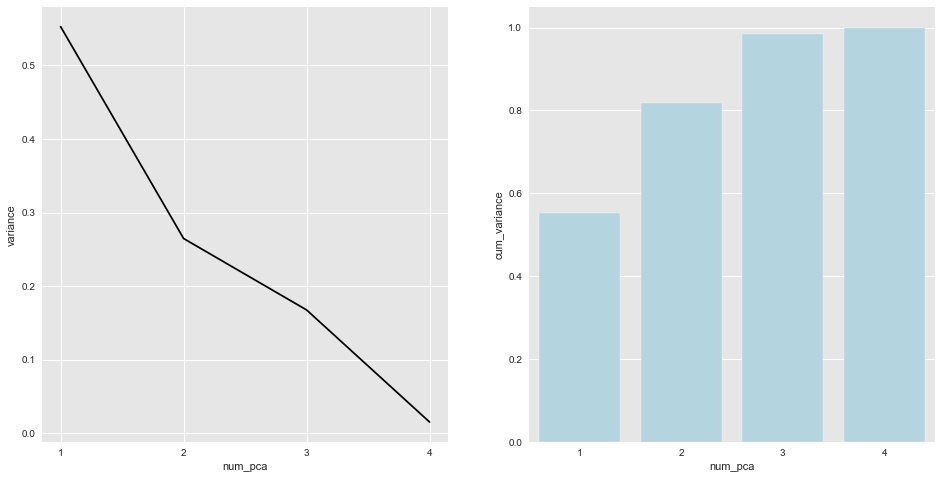

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,5))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

### Getting the pca coeficients

In [26]:
pca.components_

array([[ 0.14444367,  0.55211584,  0.49501582,  0.65518201],
       [ 0.8757332 , -0.35113415,  0.30560597, -0.12806699],
       [ 0.46040692,  0.51383428, -0.72377324,  0.0123329 ],
       [ 0.01590128, -0.55483984, -0.3711019 ,  0.74443487]])

In [27]:
# Fisrt pca components
pca.components_[0,:]

array([0.14444367, 0.55211584, 0.49501582, 0.65518201])

In [28]:
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(4, 'TotalCharges', 0.66), (2, 'tenure', 0.55), (3, 'MonthlyCharges', 0.5), (1, 'SeniorCitizen', 0.14)]

Principal component  2
[(1, 'SeniorCitizen', 0.88), (2, 'tenure', -0.35), (3, 'MonthlyCharges', 0.31), (4, 'TotalCharges', -0.13)]

Principal component  3
[(3, 'MonthlyCharges', -0.72), (2, 'tenure', 0.51), (1, 'SeniorCitizen', 0.46), (4, 'TotalCharges', 0.01)]

Principal component  4
[(4, 'TotalCharges', 0.74), (2, 'tenure', -0.55), (3, 'MonthlyCharges', -0.37), (1, 'SeniorCitizen', 0.02)]



### Generating a regression model with the pca

In [41]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def show_errors(y_real_train, y_pred_train, y_real_test, y_pred_test):

    plt.style.use('seaborn') 

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    
    ax[0,0].scatter(x = np.exp(y_real_train), y = np.exp(y_pred_train), c = 'green')
    ax[0,0].plot([0,15000], [0,15000], linestyle = '--',c = 'black')
    ax[0,0].set_xlim(0,15000)
    ax[0,0].set_ylim(0,15000)

    ax[0,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].set_title('Train set')

    ax[0,1].hist(x = np.exp(y_real_train)-np.exp(y_pred_train), bins = 50,color = 'green')
    ax[0,1].set_xlim(-7000,7000)
    ax[0,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,1].set_title('Train set')

    ax[1,0].scatter(x = np.exp(y_real_test), y = np.exp(y_pred_test), c = 'blue')
    ax[1,0].plot([0,15000], [0,15000], linestyle = '--',c = 'black')
    ax[1,0].set_xlim(0,15000)
    ax[1,0].set_ylim(0,15000)
    ax[1,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].set_title('Test set')   

    ax[1,1].hist(x = np.exp(y_real_test)-np.exp(y_pred_test), bins = 50,color = 'blue')
    ax[1,1].set_xlim(-7000,7000)
    ax[1,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,1].set_title('Test set')

    fig.tight_layout()
    pass

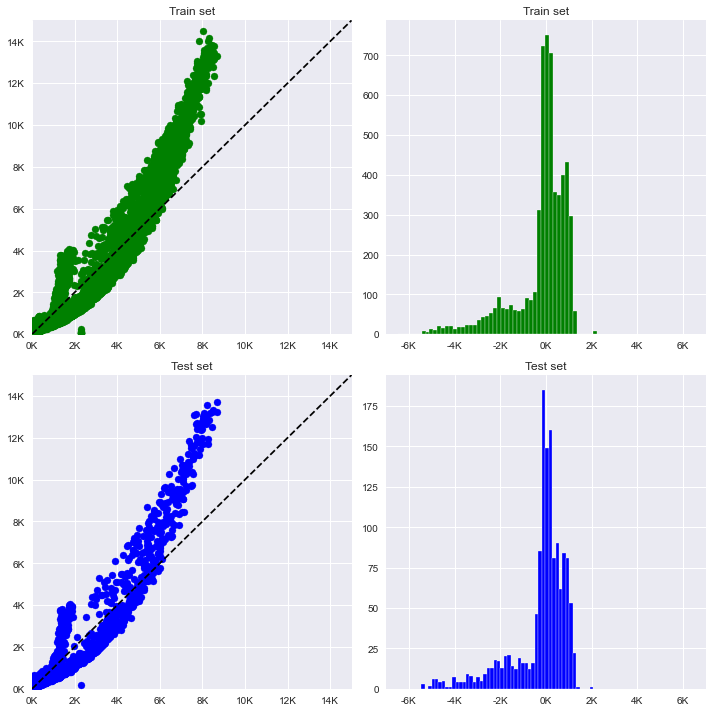

In [42]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred_train = lm.predict(X_train)
y_pred_test  = lm.predict(X_test)

show_errors(y_train, y_pred_train, y_test, y_pred_test)